In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [202]:
class Perceptron:
    '''
      Inicializa os pesos
    '''
    def __init__(self, x):
        
        np.random.seed(59)

        self.weights = np.random.rand(x.shape[1]) 
        self.pretrained = False

     #   print(self.weights.shape)
    #    print(x.shape)
        
        
        
        
        
    
    ''' 
        Treina o Perpectron por um determinado número de epochs, armazenando
        os pesos, acuracia e erros
    '''
    def train(self, epochs, LR, X_train, Y_train):

        
        
        errors = []
        acc = []


        for epoch in range(epochs):
            
            erros = 0
            acertos = 0
            iterations = X_train.shape[0]

            for i in range(iterations):
                u = np.dot(self.weights, X_train[i])
                
                y = np.sign(u) # função de ativação do degrau bipolar
                

                error = Y_train[i] - y


                self.weights = self.weights + LR * (error) * X_train[i]
                    
                
                erros += int(Y_train[i] != y)
                acertos += int(Y_train[i] == y)
            
            errors.append(erros/iterations)
            acc.append(acertos/iterations)

            
                                 
    
        self.loss = errors    
        self.acc_train = acc
        self.pretrained = True

    


    '''
    Avalia o modelo treinado no dataset escolhido.
    Retorna um vetor com os erros e acurácia de cada interação
    '''  
    def eval(self, X_test, Y_test):
        if not self.pretrained :
            raise RuntimeError("Model is not pretrained")
        




        erros = 0
        acertos = 0
        iterations = X_test.shape[0]

        for i in range(iterations):
            u = np.dot(X_test[i], self.weights)

            y = np.sign(u)

            error = y - Y_test[i]
            
            erros += int(Y_test[i] != y)
            acertos += int(Y_test[i] == y)
            

        

        return erros/iterations, acertos/iterations
    



    ''' 
    Cria o gráfico de error por epoch
    '''
    def plot_training_metrics(self, concat=""):
        
        if not self.pretrained:
            raise RuntimeError("Modelo precisa estar treinado antes")

        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        sns.lineplot(x=range(len(self.loss)), y=self.loss, marker='o')
        plt.title("Perda (Loss) durante o Treinamento" + concat)
        plt.xlabel("Épocas")
        plt.ylabel("Loss")
        plt.ylim(0, 1)  #

        plt.subplot(1, 2, 2)
        sns.lineplot(x=range(len(self.acc_train)), y=self.acc_train, marker='o')
        plt.title("Acurácia durante o Treinamento" + concat)
        plt.xlabel("Épocas")
        plt.ylabel("Acurácia")
        plt.ylim(0, 1)  

        plt.tight_layout()
        plt.show()


    '''
    Função para plotar os dados de treinamento com a fronteira de decisão
    '''
    def plot_decision_boundary_train(self, X_train, Y_train):
        if not self.pretrained:
            raise RuntimeError("Modelo precisa estar treinado antes de plotar a fronteira de decisão")


        # Removendo o bias do conjunto
        X_train  = X_train[:, 1:]
        self.weights= self.weights[1:]

        plt.figure(figsize=(10, 6))

        
        sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=Y_train, palette='coolwarm', style=Y_train, markers=['o', 's'], s=100)

        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

        Z = np.dot(np.c_[xx.ravel(), yy.ravel()], self.weights)  
        Z = Z.reshape(xx.shape)

        plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k', linestyles='--')

        plt.title("Fronteira de Decisão - Dados de Treinamento")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.legend(title="Classes")
        plt.tight_layout()
        plt.show()
    
    '''
    Função para plotar os dados de teste com a mesma fronteira de decisão
    '''
    def plot_decision_boundary_test(self, X_test, Y_test):
        if not self.pretrained:
            raise RuntimeError("Modelo precisa estar treinado antes de plotar a fronteira de decisão")



        # Removendo o bias do conjunto
        X_test  = X_test[:, 1:]
        plt.figure(figsize=(10, 6))

        sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=Y_test, palette='coolwarm', style=Y_test, markers=['X', 'D'], s=100)

      
        x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
        y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

        Z = np.dot(np.c_[xx.ravel(), yy.ravel()], self.weights)  # produto escalar
        Z = Z.reshape(xx.shape)

        plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k', linestyles='--')

        plt.title("Fronteira de Decisão - Dados de Teste")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.legend(title="Classes")
        plt.tight_layout()
        plt.show()

        


        


### Lendo arquivos do dataset


In [203]:

def load_file_dataset(filename):
    df_train = pd.read_csv(filename)
    
    X =  df_train.drop('label', axis=1).values
    Y = df_train['label'].values

    # adicionando bias constante 1
    X = np.hstack((np.ones((X.shape[0], 1)), X))


    
    return X, Y 




## Dataset 1

Nesse conjunto, os dados são linearmente separáveis e o Perceptron consegue encontrar uma linha separadora. O modelo obtém bons resultados.

 Melhor acurácia encontrada na epoch 12: 0.979


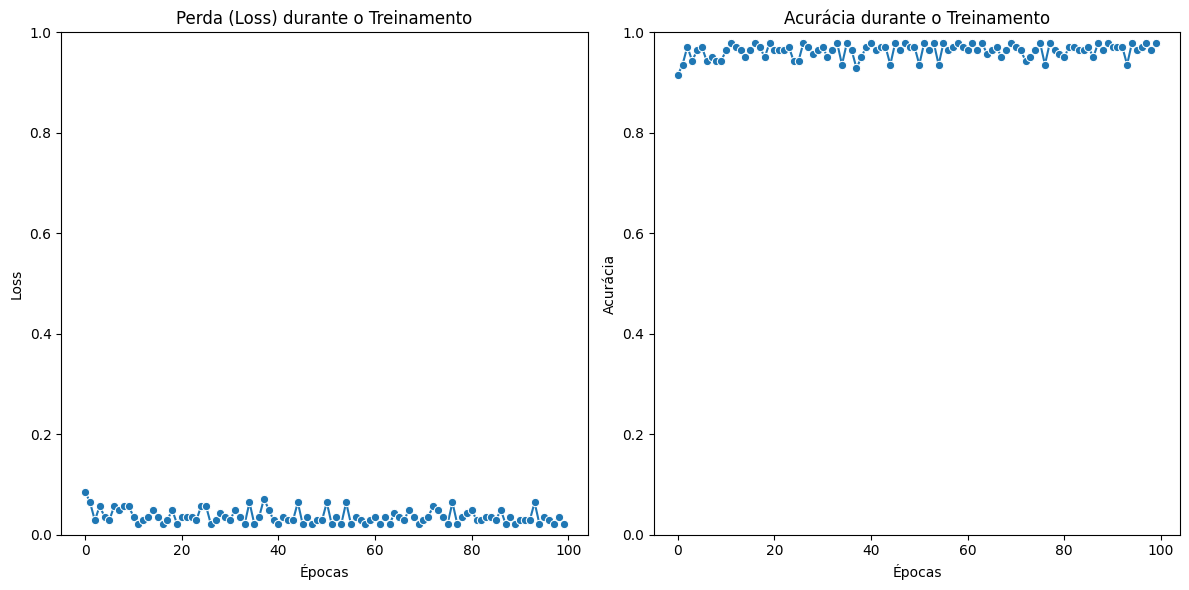

 Perda nos dados de teste: 0.05
 Acurácia nos dados de teste: 0.95


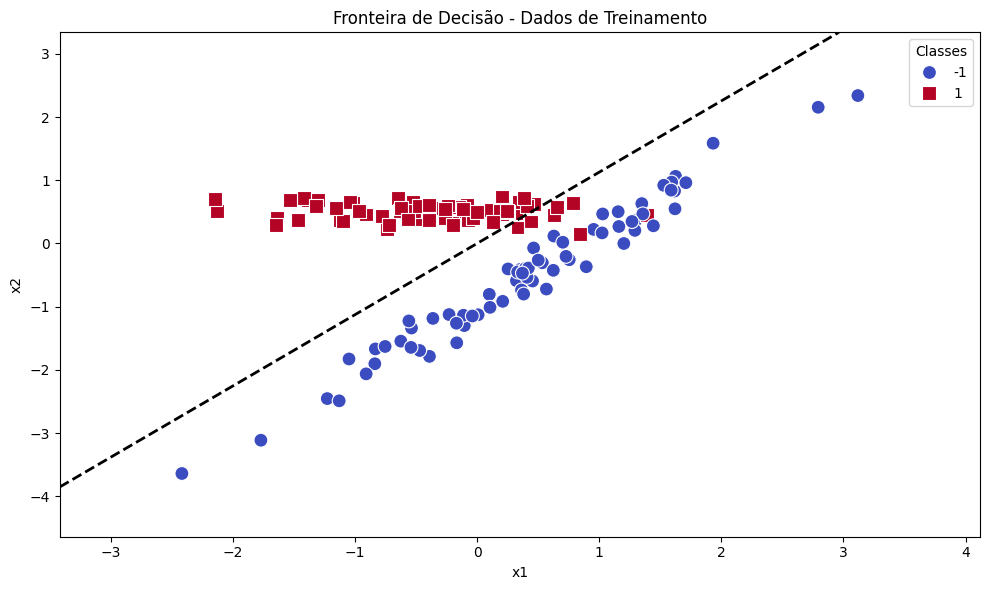

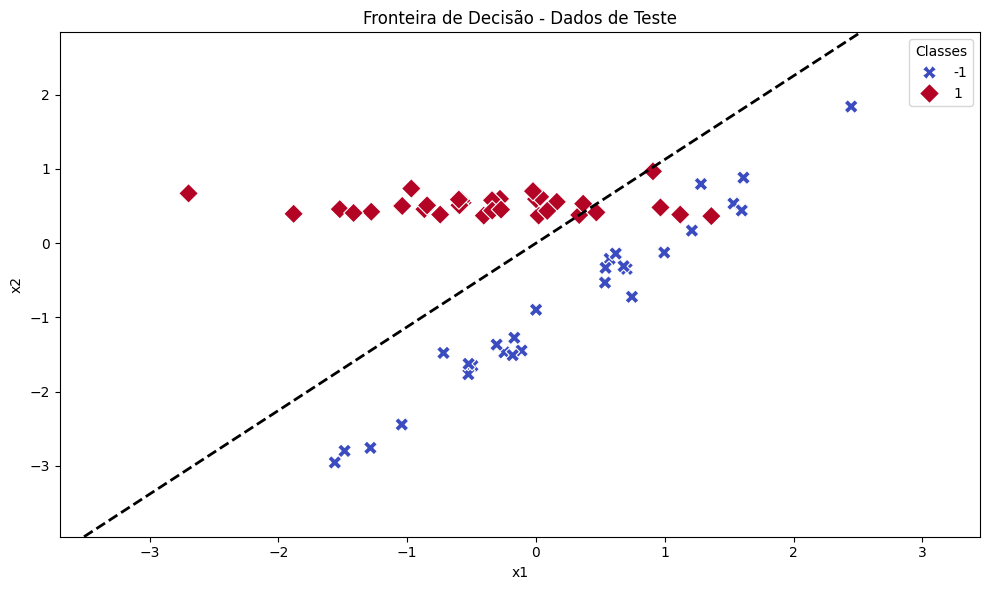

In [204]:

X_train, Y_train = load_file_dataset("train_dataset1.csv")
X_test, Y_test = load_file_dataset("test_dataset1.csv")


perceptron = Perceptron(x=X_train)

perceptron.train(100, 0.1, X_train, Y_train)

best_epoch = np.argmin(perceptron.loss)
print(f" Melhor acurácia encontrada na epoch {best_epoch + 1}: {round(perceptron.acc_train[best_epoch],3)}")

perceptron.plot_training_metrics()


loss, acc = perceptron.eval(X_test, Y_test)

print(f" Perda nos dados de teste: {round (loss,3)}")
print(f" Acurácia nos dados de teste: {round(acc, 3)}")

perceptron.plot_decision_boundary_train(X_train, Y_train)
perceptron.plot_decision_boundary_test(X_test, Y_test)


## Dataset 2

Nesse conjunto, os dados não são linearmente separáveis. Ocorre *underfitting*, o modelo é muito simples para lidar com os dados, obtendo resultados ruins.


 Melhor acurácia encontrada na epoch 2: 0.509


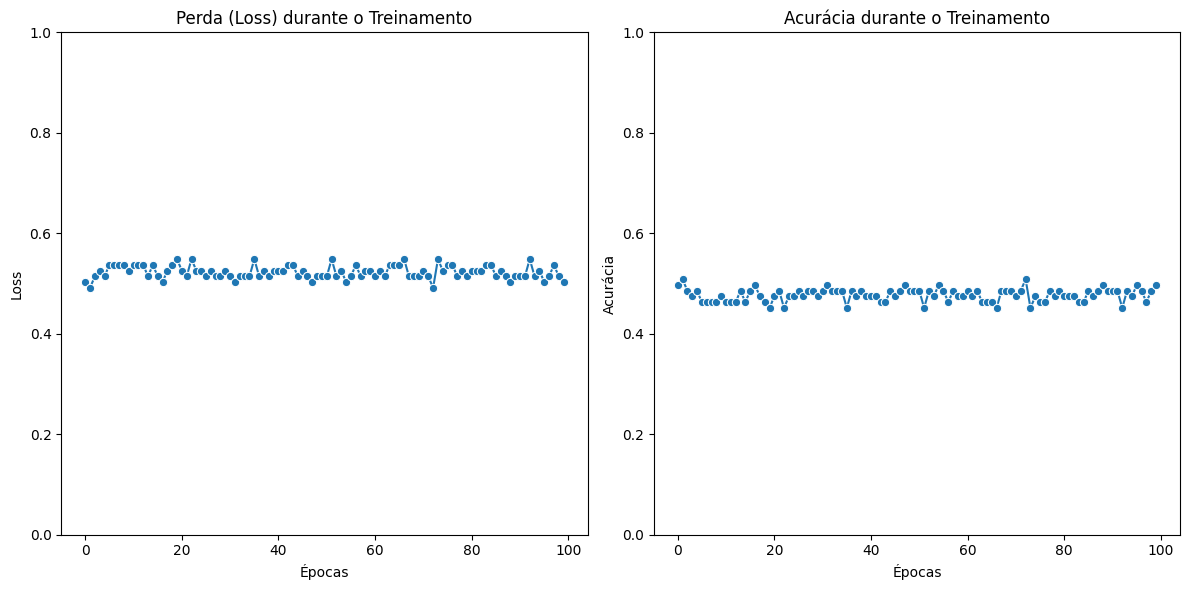

 Perda nos dados de teste: 0.387
 Acurácia nos dados de teste: 0.613


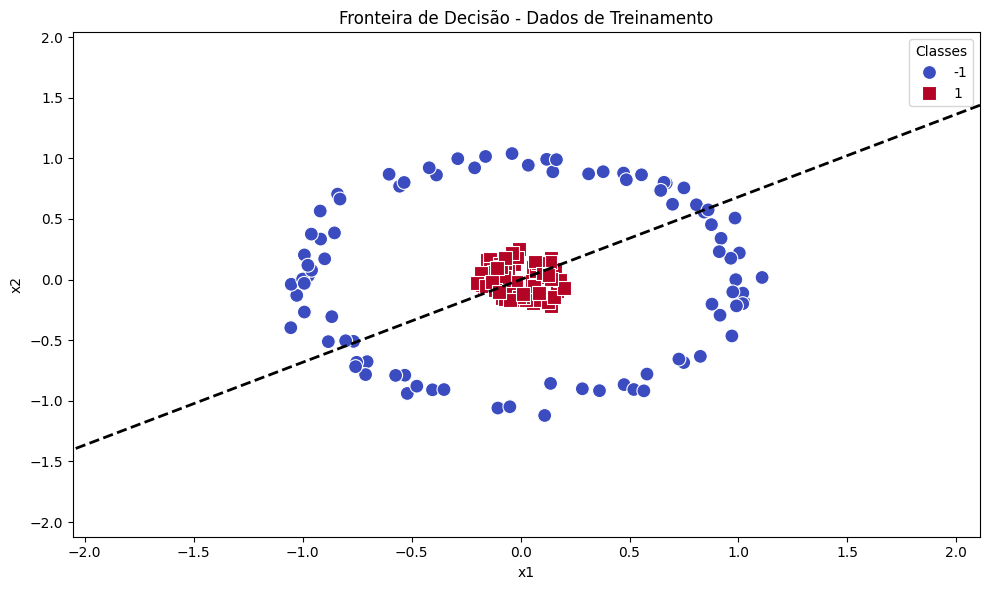

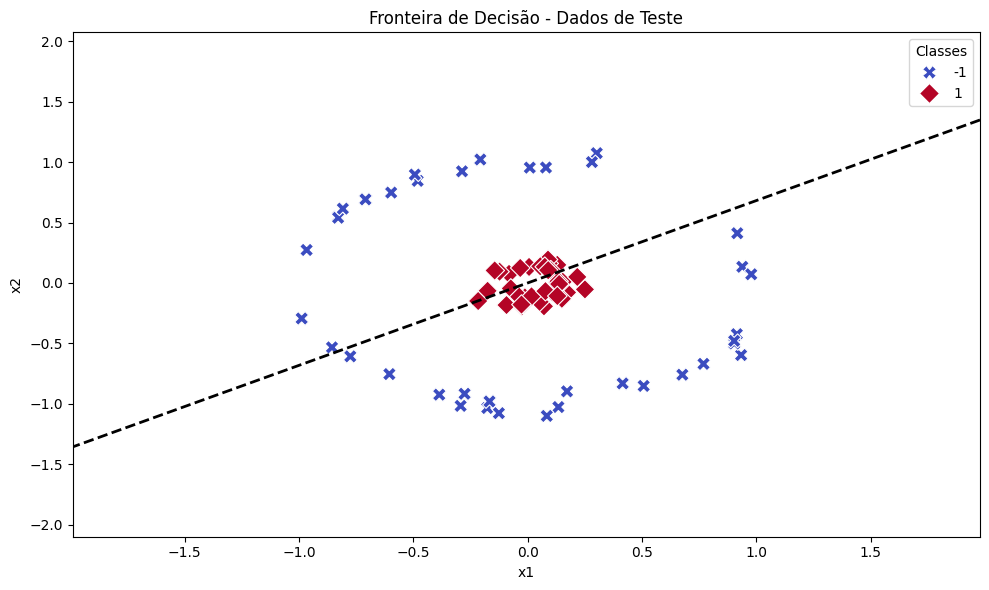

In [205]:

X_train, Y_train = load_file_dataset("train_dataset2.csv")
X_test, Y_test = load_file_dataset("test_dataset2.csv")


perceptron = Perceptron(x=X_train)

perceptron.train(100, 0.1, X_train, Y_train)

best_epoch = np.argmin(perceptron.loss)
print(f" Melhor acurácia encontrada na epoch {best_epoch + 1}: {round(perceptron.acc_train[best_epoch], 3)}")

perceptron.plot_training_metrics()


loss, acc = perceptron.eval(X_test, Y_test)

print(f" Perda nos dados de teste: {round(loss,3)}")
print(f" Acurácia nos dados de teste: {round(acc, 3)}")

perceptron.plot_decision_boundary_train(X_train, Y_train)
perceptron.plot_decision_boundary_test(X_test, Y_test)


## Dataset 3

Nos experimentos com LR = 0.1, houve pouca variação dos resultados. A acurácia média no treino é praticamente a mesma nos dois conjuntos, assim como a acurácia máxima obtida. A acurácia nos dados de teste varia um pouco por estarem usando os pesos respectivos das últimas iterações. Como é possível perceber nos gráficos de acurácia, a última iteração do treinamento com 200 epochs possui um resultado um pouco abaixo da 100th epoch. Os dois modelos convergiram no mesmo ponto, na epoch 15.


Com o LR = 0.001, é possível perceber através dos gráficos que o modelo demorou um pouco mais para convergir. Para 100 epochs, a melhor acurácia foi obtida na epoch 92, enquanto para 200 epochs a melhor acurácia foi obtida na epoch 130. Dessa maneira, o modelo não convergiu totalmente com 100 epochs, sendo possível obter resultados melhores com mais treinamento.

Por fim, utilizando LR = 0.0001, é possível perceber ainda mais os efeitos de um LR baixo. O modelo não consegue convergir totalmente com 100 epochs, de modo que treinando por 200 epochs a acurácia média aumente 7.4 % e a acurácia máxima em 6.1%.

 Melhor acurácia encontrada na epoch 16: 0.918


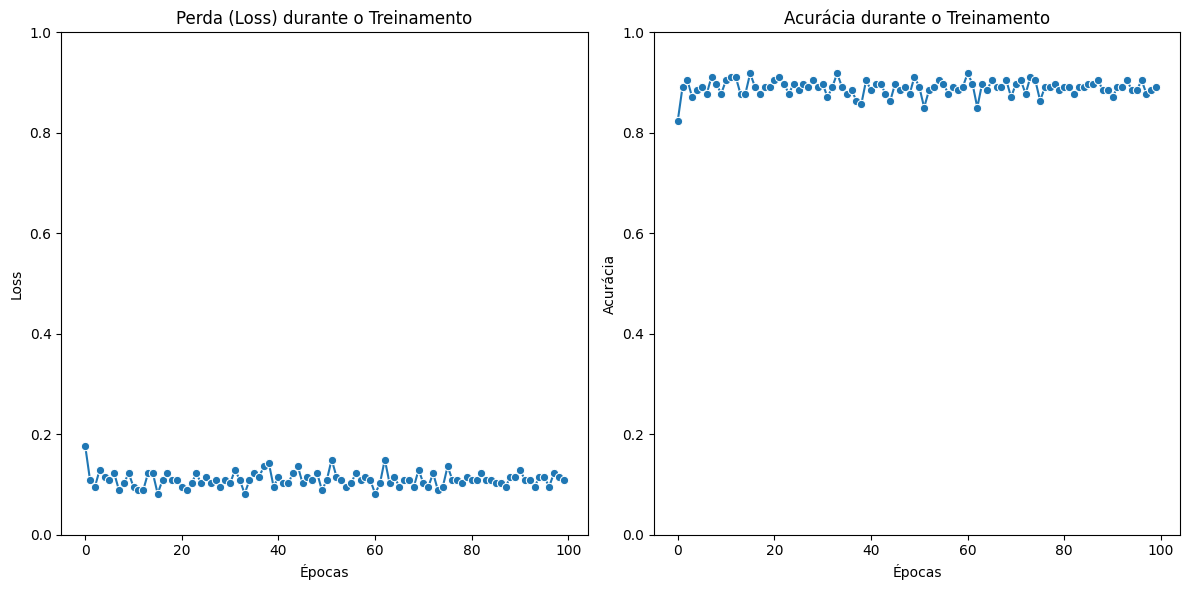

 Perda nos dados de teste: 0.206
 Acurácia nos dados de teste: 0.794


In [206]:

X_train, Y_train = load_file_dataset("train_dataset3.csv")
X_test, Y_test = load_file_dataset("test_dataset3.csv")


perceptron = Perceptron(x=X_train)

perceptron.train(100, 0.1, X_train, Y_train)

best_epoch = np.argmin(perceptron.loss)
print(f" Melhor acurácia encontrada na epoch {best_epoch + 1}: {round (perceptron.acc_train[best_epoch], 3)}")

perceptron.plot_training_metrics()


loss, acc = perceptron.eval(X_test, Y_test)

print(f" Perda nos dados de teste: {round(loss, 3)}")
print(f" Acurácia nos dados de teste: {round(acc,3)}")




Resultados para epochs = 100 e LR = 0.1
Acurácia média treino: 0.89 com desvio padrão 0.015
Melhor acurácia treino: 0.918 encontrada na epoch 15
Resultados no conjunto de teste: 0.794


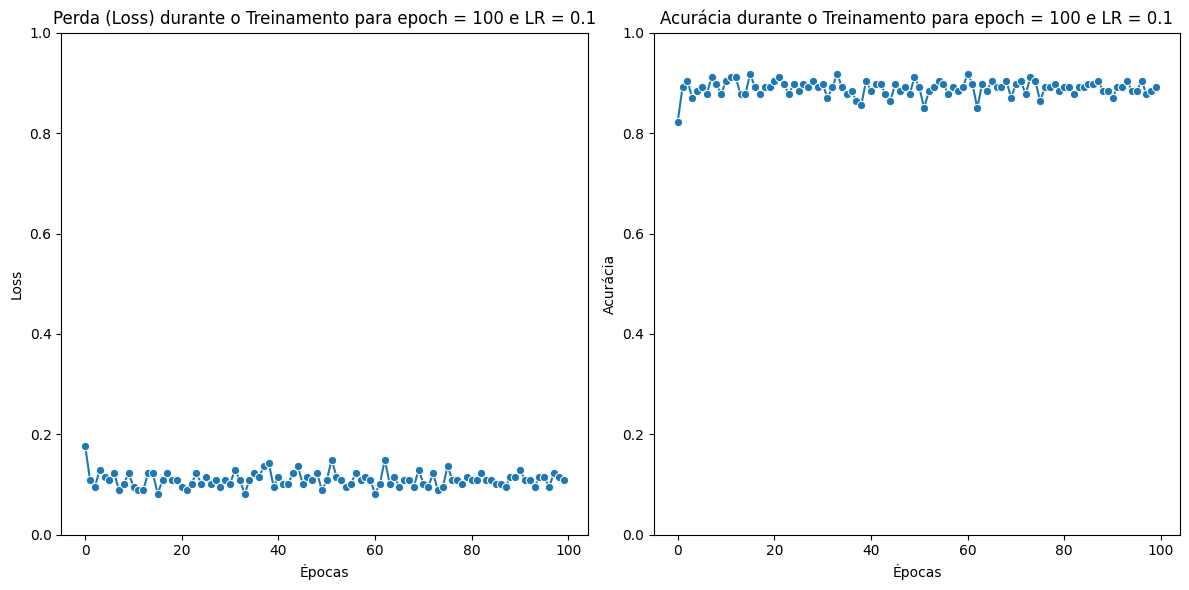

Resultados para epochs = 200 e LR = 0.1
Acurácia média treino: 0.89 com desvio padrão 0.015
Melhor acurácia treino: 0.918 encontrada na epoch 15
Resultados no conjunto de teste: 0.857


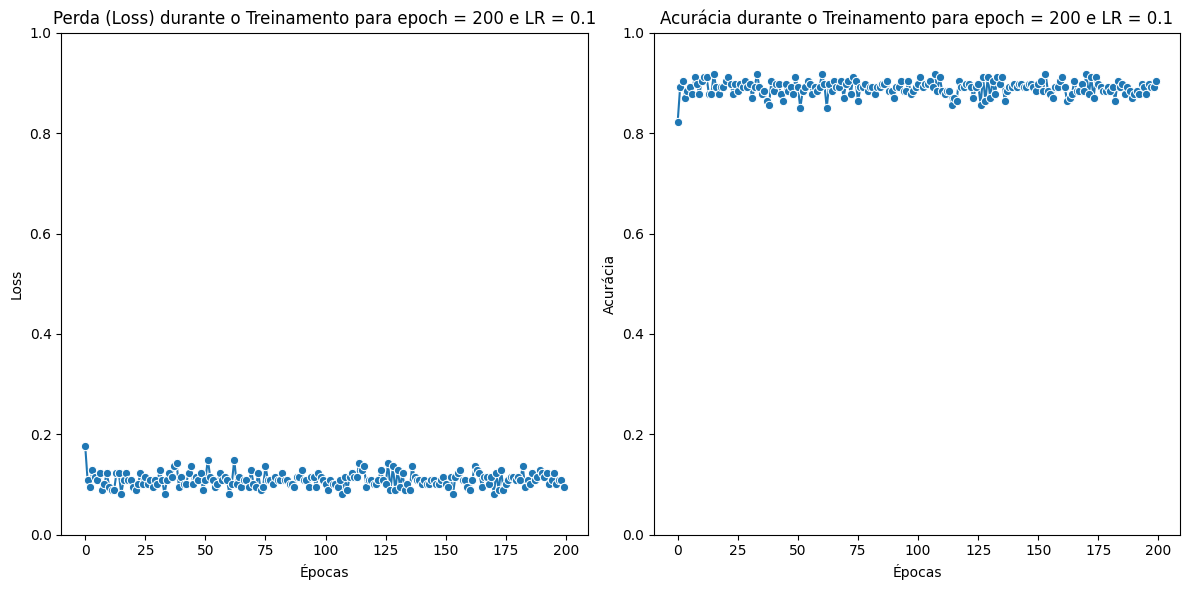

Resultados para epochs = 100 e LR = 0.001
Acurácia média treino: 0.901 com desvio padrão 0.061
Melhor acurácia treino: 0.946 encontrada na epoch 92
Resultados no conjunto de teste: 0.841


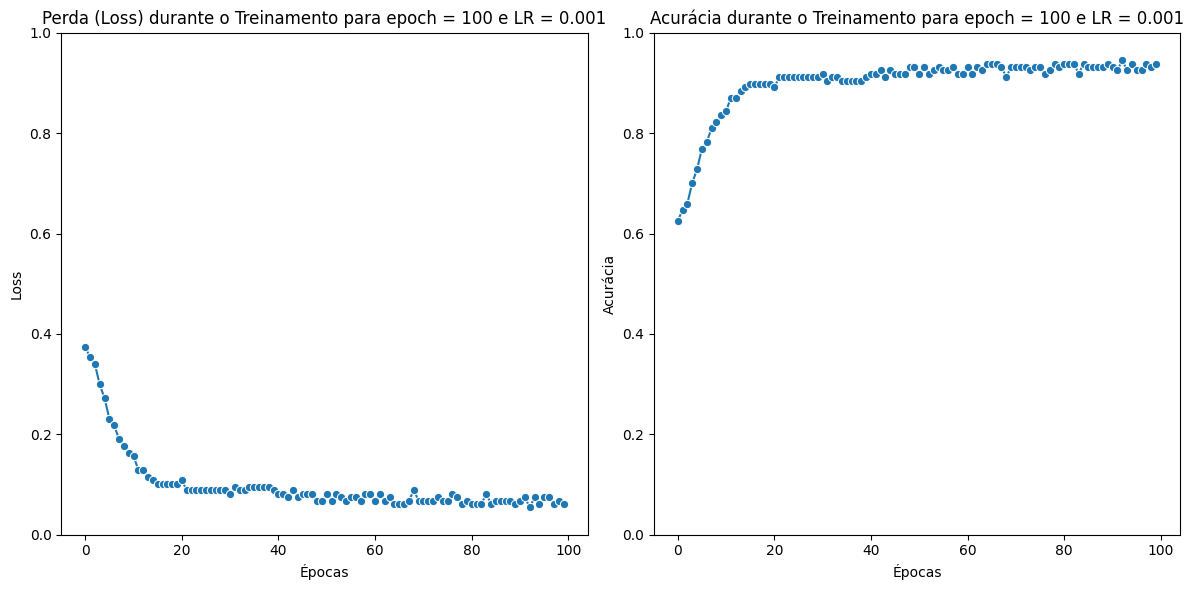

Resultados para epochs = 200 e LR = 0.001
Acurácia média treino: 0.912 com desvio padrão 0.046
Melhor acurácia treino: 0.952 encontrada na epoch 130
Resultados no conjunto de teste: 0.841


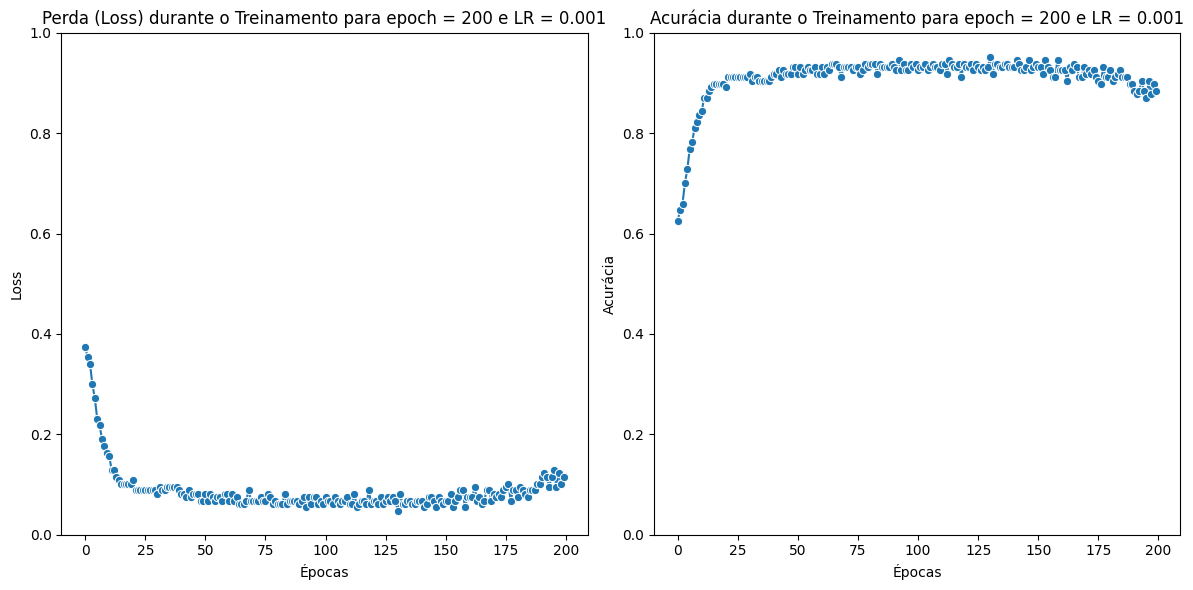

Resultados para epochs = 100 e LR = 0.0001
Acurácia média treino: 0.739 com desvio padrão 0.075
Melhor acurácia treino: 0.844 encontrada na epoch 97
Resultados no conjunto de teste: 0.825


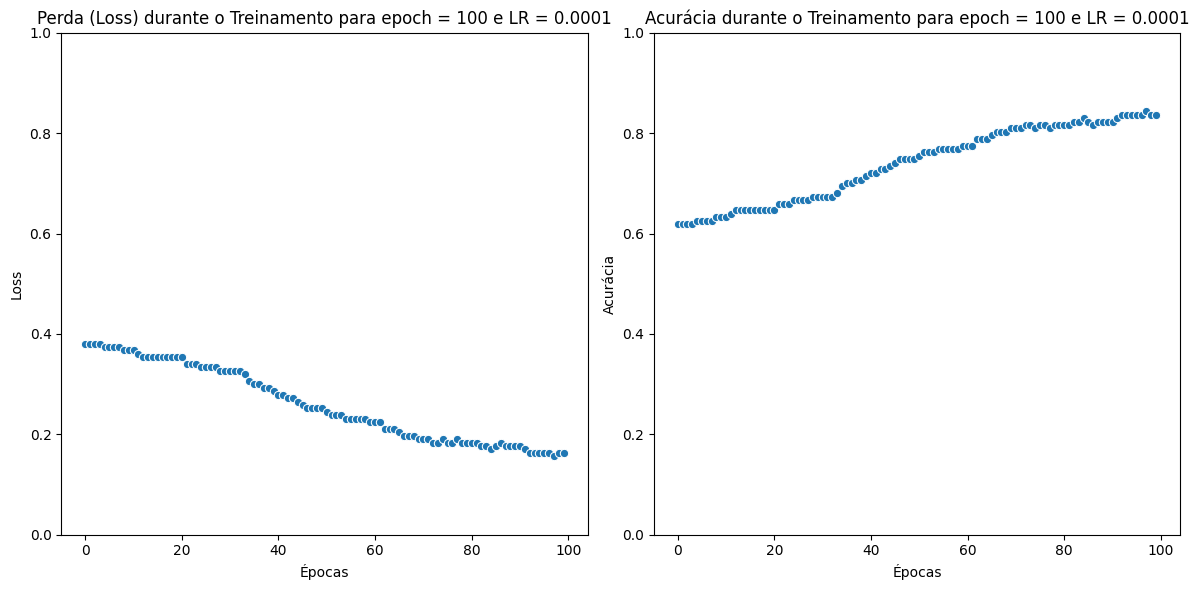

Resultados para epochs = 200 e LR = 0.0001
Acurácia média treino: 0.813 com desvio padrão 0.092
Melhor acurácia treino: 0.905 encontrada na epoch 152
Resultados no conjunto de teste: 0.857


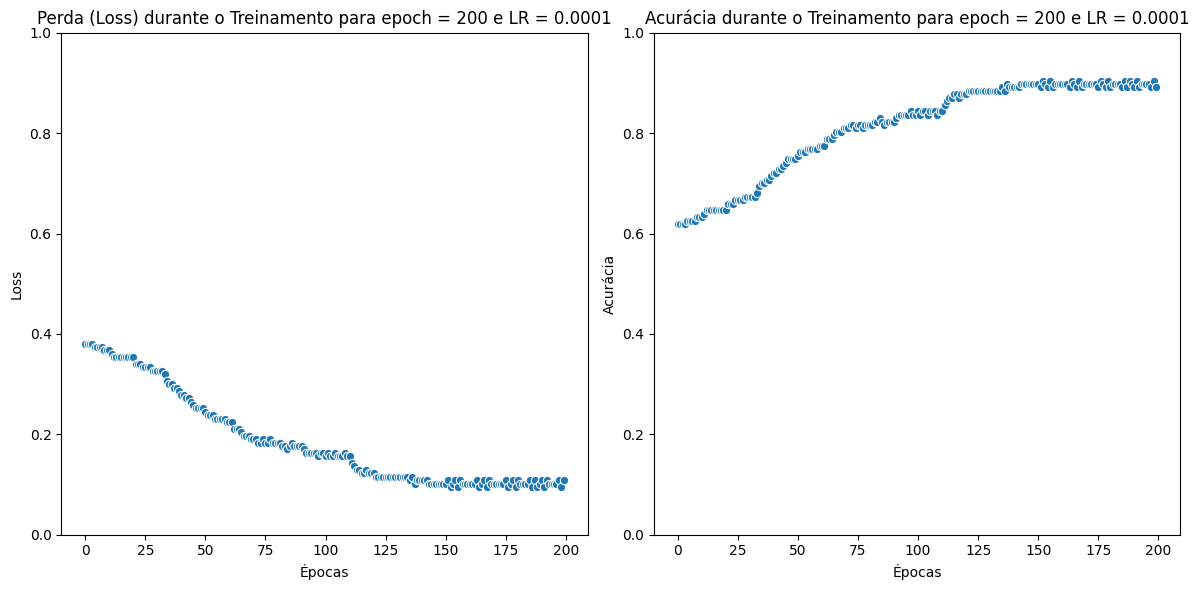

In [207]:


LR=[0.1, 0.001, 0.0001]
epochs = [100, 200]

acc_treino = []
acc_test = []
melhor_acc_treino = []
for lr in LR:
    for epoch in epochs:
        perceptron = Perceptron(X_train)
        perceptron.train(epoch, lr, X_train, Y_train)
        print(f"Resultados para epochs = {epoch} e LR = {lr}")
        print(f"Acurácia média treino: {round(np.mean(perceptron.acc_train), 3)} com desvio padrão {round (np.std(perceptron.acc_train),3 )}")
        print(f"Melhor acurácia treino: {round(np.max(perceptron.acc_train), 3)} encontrada na epoch {np.argmax(perceptron.acc_train)}")

        acc_treino.append(np.mean(perceptron.acc_train))
        melhor_acc_treino.append(np.max(perceptron.acc_train))
        
        _, acc =  perceptron.eval(X_test, Y_test)
        acc_test.append(acc)

        print(f"Resultados no conjunto de teste: {round(acc,3)}")
        perceptron.plot_training_metrics(f" para epoch = {epoch} e LR = {lr}")






In [208]:
print(f"Acurácia média treino em todas combinações: {round(np.mean(acc_treino), 3)} com desvio padrão {round (np.std(acc_treino),3 )}")
print(f"Média da acurácia máxima do treino em todas combinações: {round(np.mean(melhor_acc_treino), 3)} com desvio padrão {round (np.std(melhor_acc_treino),3 )}")
print(f"Acurácia média teste em todas combinações: {round(np.mean(acc_test), 3)} com desvio padrão {round (np.std(acc_test),3 )}")




Acurácia média treino em todas combinações: 0.858 com desvio padrão 0.062
Média da acurácia máxima do treino em todas combinações: 0.914 com desvio padrão 0.035
Acurácia média teste em todas combinações: 0.836 com desvio padrão 0.022
